# DH 140 Final Project W22

Spurthi Rallapalli, Cindy Zheng, Carol Cheng
3/11/22

## Requirements

Jupyter Notebook:
- [x] Importing, cleaning, organizing, merging, and processing the data using pandas and/or other python libraries
- [ ] Basic statistical analysis that includes at least a set of descriptive statistics and informative plots of the data (such as scatter plots, histograms, bar plots, box plots, etc)
- [ ] You must utilize at least one Python library outside Pandas that we have covered in our study of data visualization, mapping, web scraping, APIs, text analysis, statistics, basic machine learning, and network analysis
- [ ] Tell the story of your analysis in 1500+ words (not including tables, figures, captions, or references).
- [x] Be organized into four sections. (Introduction, Methods, Results, Discussion)
- [x] The top of your notebook must include your name(s), the date, and your project title.
- [ ] If you are working in a group, the end must describe each group member's contribution to this final project (one sentence each).

Jupyter notebook for your blog site
- [ ] Present your analysis and narrative without the fluff
- [ ] The notebook/blog should be very similar to your project notebook with the exception that it should hide trivial code (such as exploratory analysis and plotting) and remove narrative unnecessary to addressing your primary question.
- [ ] Nontrivial code (including library imports, data preparation steps, and key data analysis/plotting code) should still be included.

## Research Topic Introduction

**Research Question:** Our research question is "How does a song's popularity spread over time depending on the origin country of the artist, and how much of that is attributed to the lyrics / word patterns in that song?"

For this analysis, we specifically picked two artists from the United States and the UK, analyzed the popularity of their songs, and did a lyrical analysis. 

**Why it is important to you, why it matters to others, and what is at stake:** Music is something that everyone connects to, and our group wants to find a way to measure how and why music is spread across the world. It’s a way for musicians to figure out which kind of music allows them to connect with different audiences and cross cultural and linguistic barriers. It’s also a way for us as listeners to help determine what connects us to certain kinds of music, what word frequencies and thematic patterns matter most to us, and what cultural practices and norms cause certain groups to listen (or not to listen) to certain types of music. Essentially, it’s a way to determine what connects us all!

**Description of data sources used:**
The first data source is from Spotify Charts. Spotify Charts is a website from the popular music streaming app, Spotify. Spofity constantly keeps ranking of how often songs are streamed from their uses, and keeps track of which songs are streamed the most. Spotify also separates these streaming counts by country. The top 200 songs of each day or week and their total streams are available to download in csv format from Spotify Charts. The data can be found at https://spotifycharts.com/. 

The second data source will be song lyrics. These can be found on genius.com, and we will be copying and pasting the text lyrics from those websites to perform text analysis. https://genius.com/

## Methods

Below is the code that we used to import the data into our Jupyter Notebook. We went to Spotify Charts to look at Top 200 Hits Data for every week in 2021 in the United States and the UK:   

In [1]:
import pandas as pd
import os
import glob
import requests
from bs4 import BeautifulSoup as bs
import datetime
import time
import numpy
from matplotlib import pyplot as plt
#import cloudscraper

def readData(country):
    path = os.getcwd()
    path = os.path.join(path, "Data", country, "*.csv")
    csv_files = glob.glob(path)
    # loop over the list of csv files
    weekly_charts = pd.DataFrame()

    for f in csv_files:

        filename = os.path.basename(f)
        # read the csv file
        df = pd.read_csv(f)

        idx = filename.index('weekly')
        date_time_obj = datetime.datetime.strptime(filename[idx+7:-4], '%Y-%m-%d')

        df["date"] = date_time_obj

        weekly_charts= weekly_charts.append(df)
    return weekly_charts

weekly_us_charts = readData("us")
weekly_gb_charts = readData("gb")
#weekly_global_charts = readData("GlobalData")


In the code above, we created a function readData that allowed us to create 2 different datasets, one for the US and one for the UK. Let's start by doing a preliminary analysis of the data. 

In [2]:
weekly_us_charts.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,1,12,9688481,2021-10-14
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,2,14,8460919,2021-10-14
2,3,spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,"Drake, 21 Savage, Project Pat",Knife Talk (with 21 Savage ft. Project Pat),OVO,2,3,6,7662116,2021-10-14
3,4,spotify:track:0k1WUmIRnG3xU6fvvDVfRG,"Drake, Future, Young Thug",Way 2 Sexy (with Future & Young Thug),OVO,1,4,6,7071703,2021-10-14
4,5,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,5,5,46,6799327,2021-10-14


In [3]:
weekly_gb_charts.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,Olivia Rodrigo,drivers license,Olivia Rodrigo PS,1,1,3,5134081,2021-01-28
1,2,spotify:track:27OeeYzk6klgBh83TSvGMA,The Kid LAROI,WITHOUT YOU,Columbia,2,3,12,1777331,2021-01-28
2,3,spotify:track:4I5bvu2KDsrCg0EWHIcvul,"Anne-Marie, KSI, Digital Farm Animals",Don't Play,Asylum Records,2,2,2,1721569,2021-01-28
3,4,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,SZA,Good Days,Top Dawg Entertainment/RCA Records,4,5,5,1484337,2021-01-28
4,5,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,CJ,Whoopty,CJ Music Group/T-Series,3,4,15,1438281,2021-01-28


As seen above, a quick look into the data shows that there are a couple of fields that our data encompasses that are common among the two datasets: 
- rank
- uri
- arist name(s)
- track name
- source
- peak rank
- previous rank
- weeks on chart
- streams
- date

I also want to get a sense of which dates we are looking at across the two countries, so I'm going to do a quick analysis of the date field to see which dates are included.

In [4]:
weekly_us_charts['date'].unique()

array(['2021-10-14T00:00:00.000000000', '2021-08-19T00:00:00.000000000',
       '2021-06-03T00:00:00.000000000', '2021-11-18T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-05-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-06-10T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-07-15T00:00:00.000000000',
       '2021-09-30T00:00:00.000000000', '2021-12-23T00:00:00.000000000',
       '2021-03-18T00:00:00.000000000', '2021-03-25T00:00:00.000000000',
       '2021-09-16T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2021-12-02T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
       '2021-06-17T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-06-24T00:00:00.000000000',
       '2021-05-27T00:00:00.000000000', '2021-05-20T00:00:00.000000000',
       '2021-10-28T00:00:00.000000000', '2021-05-06

In [5]:
len(weekly_us_charts['date'].unique())

52

In [6]:
weekly_gb_charts['date'].unique()

array(['2021-01-28T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2021-12-23T00:00:00.000000000', '2021-06-17T00:00:00.000000000',
       '2021-08-05T00:00:00.000000000', '2021-07-15T00:00:00.000000000',
       '2021-04-22T00:00:00.000000000', '2021-09-30T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-06-03T00:00:00.000000000', '2021-04-15T00:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2021-10-07T00:00:00.000000000',
       '2021-12-02T00:00:00.000000000', '2021-09-16T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-02-25T00:00:00.000000000',
       '2021-05-20T00:00:00.000000000', '2021-09-23T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-05-06T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-11-11

In [7]:
len(weekly_gb_charts['date'].unique())

52

For this analysis, we want to make sure that the two datasets cover the same dates, so we'll do a check right now to see if the dates are the same. 

In [8]:
for day in weekly_us_charts['date'].unique(): 
    if day not in weekly_gb_charts['date'].unique():
        print(day)

In [9]:
for day in weekly_gb_charts['date'].unique(): 
    if day not in weekly_us_charts['date'].unique():
        print(day)

This means that all the dates are the same in both of the datasets!

The other thing we also noticed is that the dates are not in order, so we will try to reorder them. [This link](https://stackoverflow.com/questions/17141558/how-to-sort-a-dataframe-in-python-pandas-by-two-or-more-columns) helped with that.



In [10]:
weekly_us_charts = weekly_us_charts.sort_values(by=['date','rank'], ascending = [True, True])


In [11]:
weekly_gb_charts = weekly_gb_charts.sort_values(by=['date','rank'], ascending = [True, True])


If we take a look at the first and last few values of each chart, we can see that they have been put in the right order by date and kept the ranking the same. 

In [12]:
weekly_us_charts.head(10)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,SZA,Good Days,Top Dawg Entertainment/RCA Records,1,10,2,6323585,2021-01-07
1,2,spotify:track:31qCy5ZaophVA81wtlwLc4,Justin Bieber,Anyone,RBMG/Def Jam,2,-1,1,6149984,2021-01-07
2,3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,Ariana Grande,34+35,Republic Records,2,2,10,5606876,2021-01-07
3,4,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,"24kGoldn, iann dior",Mood (feat. iann dior),Records/Columbia,2,4,22,5583614,2021-01-07
4,5,spotify:track:7hxHWCCAIIxFLCzvDgnQHX,"Internet Money, Gunna, Don Toliver, NAV","Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money Records/ TenThousand Projects,1,5,21,5368252,2021-01-07
5,6,spotify:track:4MzXwWMhyBbmu6hOcLVD49,"Bad Bunny, Jhay Cortez",DÁKITI,Rimas Entertainment LLC,1,6,10,5161927,2021-01-07
6,7,spotify:track:35mvY5S1H3J2QZyna3TFe0,Ariana Grande,positions,Republic Records,1,9,11,5102841,2021-01-07
7,8,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,CJ,Whoopty,CJ Music Group/T-Series,8,13,11,4877062,2021-01-07
8,9,spotify:track:27OeeYzk6klgBh83TSvGMA,The Kid LAROI,WITHOUT YOU,Columbia,9,11,8,4777818,2021-01-07
9,10,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,Republic Records,1,19,58,4440447,2021-01-07


In [13]:
weekly_us_charts.tail(10)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
190,191,spotify:track:370oYn3s5EKu7ziUpMQQTr,Amy Grant,White Christmas,Amy Grant Label (AGG),65,127,11,1561617,2021-12-30
191,192,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,EMI / Interscope,4,192,46,1553987,2021-12-30
192,193,spotify:track:2ZXxRC6V6AXzMdbLQZMHSB,Lil Tecca,LOT OF ME,Galactic / Republic Records,65,-1,13,1553543,2021-12-30
193,194,spotify:track:30QR0ndUdiiMQMA9g1PGCm,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",G59 Records,37,-1,39,1551895,2021-12-30
194,195,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,Shawn Mendes,It'll Be Okay,Shawn Mendes LP4-5 PS/ Island,100,-1,2,1551299,2021-12-30
195,196,spotify:track:4jPy3l0RUwlUI9T5XHBW2m,"24kGoldn, iann dior",Mood (feat. iann dior),Records/Columbia,2,-1,72,1544286,2021-12-30
196,197,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,The Weeknd,Die For You,Universal Republic Records,74,-1,42,1536551,2021-12-30
197,198,spotify:track:7kDUspsoYfLkWnZR7qwHZl,"Machine Gun Kelly, blackbear",my ex's best friend (with blackbear),Bad Boy/Interscope Records,11,195,73,1528614,2021-12-30
198,199,spotify:track:3J8EOeKLTLXORtWPpOU5bE,"Lil Tjay, 6LACK",Calling My Phone,Columbia,1,-1,41,1521613,2021-12-30
199,200,spotify:track:0uRrG2jRR5tuifsYIJHEao,Morgan Wallen,Sand In My Boots,Big Loud / Republic,13,-1,27,1518916,2021-12-30


I also wanted to do some summary statistics for each day.

In [14]:
days = weekly_us_charts['date'].unique()

In [15]:
for i in days:
    avg_week_on_charts = 0
    max_week_on_charts = 0
    subset = weekly_us_charts.loc[weekly_us_charts['date'] == i]
    avg_week_on_charts = subset['weeks_on_chart'].mean()
    max_week_on_charts = subset['weeks_on_chart'].max()
    avg_streams = subset['streams'].mean()
    peak_ranking = subset['peak_rank'].mode()
    ts = pd.to_datetime(str(i)) 
    d = ts.strftime('%Y-%m-%d')
    print("Country: United States")
    print("Date: ", d)
    print("Average number of weeks this week’s top 200 have been on the chart: ", avg_week_on_charts)
    print("Maximum number of weeks this week’s top 200 have been on the chart: ", max_week_on_charts)
    print("Average number of steams of weeks this week’s top 200: ", avg_streams)
    print("Most common peak ranking of weeks this week’s top 200: ", peak_ranking[0])
    print("")

Country: United States
Date:  2021-01-07
Average number of weeks this week’s top 200 have been on the chart:  38.125
Maximum number of weeks this week’s top 200 have been on the chart:  210
Average number of steams of weeks this week’s top 200:  2209871.275
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-14
Average number of weeks this week’s top 200 have been on the chart:  32.755
Maximum number of weeks this week’s top 200 have been on the chart:  211
Average number of steams of weeks this week’s top 200:  2657771.18
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-21
Average number of weeks this week’s top 200 have been on the chart:  33.89
Maximum number of weeks this week’s top 200 have been on the chart:  212
Average number of steams of weeks this week’s top 200:  2521075.2
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-28
Average numb

For the data above, I used [this link](https://stackoverflow.com/questions/19502506/convert-numpy-datetime64-to-string-object-in-python) to make the date more readable.

Now, we did the same for the United Kingdom data.

In [16]:
# the days are the same so I won't redeclare them

for i in days:
    avg_week_on_charts = 0
    max_week_on_charts = 0
    subset = weekly_gb_charts.loc[weekly_gb_charts['date'] == i]
    avg_week_on_charts = subset['weeks_on_chart'].mean()
    max_week_on_charts = subset['weeks_on_chart'].max()
    avg_streams = subset['streams'].mean()
    peak_ranking = subset['peak_rank'].mode()
    ts = pd.to_datetime(str(i)) 
    d = ts.strftime('%Y-%m-%d')
    print("Country: United Kingdom")
    print("Date: ", d)
    print("Average number of weeks this week’s top 200 have been on the chart: ", avg_week_on_charts)
    print("Maximum number of weeks this week’s top 200 have been on the chart: ", max_week_on_charts)
    print("Average number of steams of weeks this week’s top 200: ", avg_streams)
    print("Most common peak ranking of weeks this week’s top 200: ", peak_ranking[0])
    print("")

Country: United Kingdom
Date:  2021-01-07
Average number of weeks this week’s top 200 have been on the chart:  43.0
Maximum number of weeks this week’s top 200 have been on the chart:  211
Average number of steams of weeks this week’s top 200:  520903.335
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-14
Average number of weeks this week’s top 200 have been on the chart:  39.57
Maximum number of weeks this week’s top 200 have been on the chart:  212
Average number of steams of weeks this week’s top 200:  584180.265
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-21
Average number of weeks this week’s top 200 have been on the chart:  40.41
Maximum number of weeks this week’s top 200 have been on the chart:  213
Average number of steams of weeks this week’s top 200:  604862.895
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-28
Average num

Then we looked at the streams for the number 1 song each week and plotted it for both the US and the UK, just to see what the trends looked like. 

In [17]:
number1us = weekly_us_charts.loc[weekly_us_charts['rank'] == 1]

In [18]:
number1uk = weekly_gb_charts.loc[weekly_gb_charts['rank'] == 1]

<AxesSubplot:xlabel='date'>

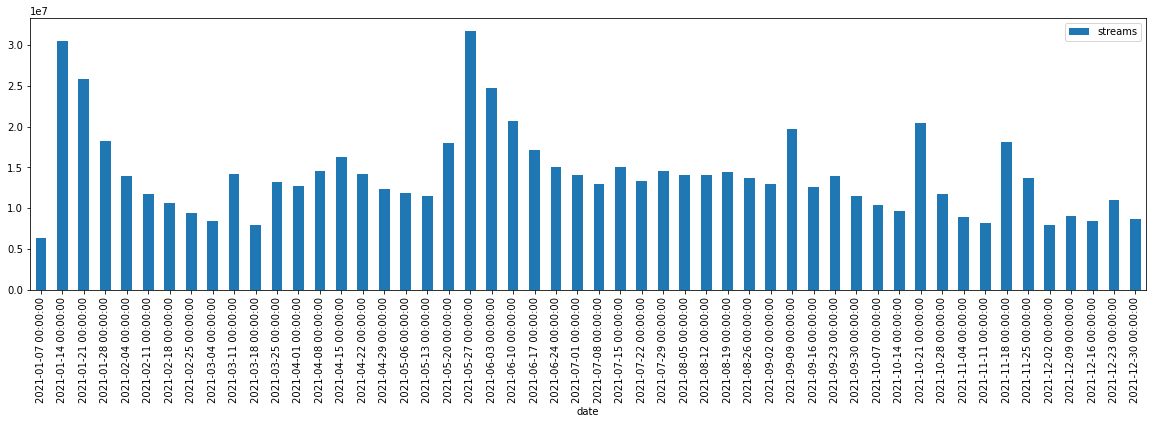

In [19]:
number1us.plot(kind='bar', x='date', y='streams', figsize=(20,5))

<AxesSubplot:xlabel='date'>

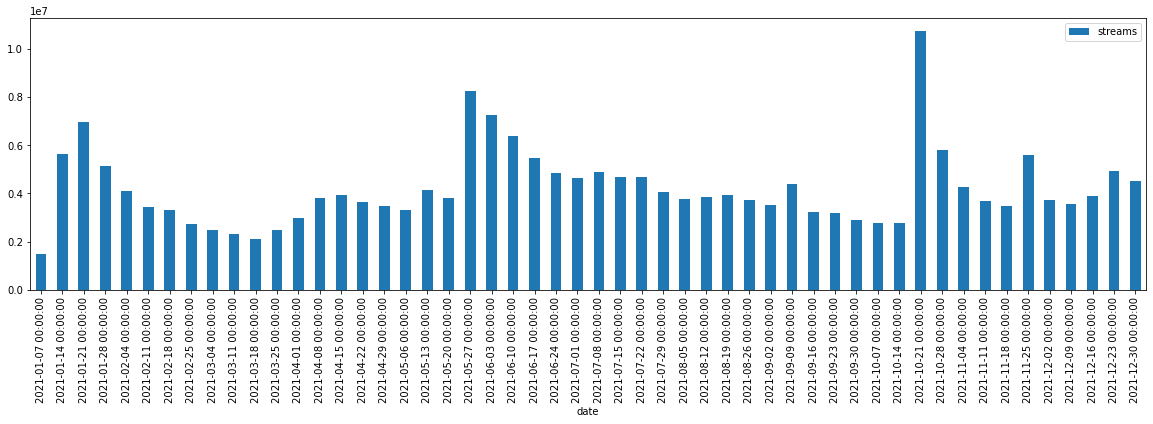

In [20]:
number1uk.plot(kind='bar', x='date', y='streams', figsize=(20,5))

We also wanted to plot the current rank compared with the previous rank for one week. We picked the day at random (2021-11-18) and plotted it for both the US and UK.

In [21]:
peakprevUS = weekly_us_charts.loc[weekly_us_charts['date'] == "2021-11-18T00:00:00.000000000"]
peakprevUS.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5enxwA8aAbwZbf5qCHORXi,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,1,-1,1,18105602,2021-11-18
1,2,spotify:track:7sMBvZCSUl99bJLXZaLa0b,"Bruno Mars, Anderson .Paak, Silk Sonic",Smokin Out The Window,Aftermath Entertainment/Atlantic,2,5,2,10067882,2021-11-18
2,3,spotify:track:4OAuvHryIVv4kMDNSLuPt6,Taylor Swift,Red (Taylor's Version),Taylor Swift,3,-1,1,8676447,2021-11-18
3,4,spotify:track:3nsfB1vus2qaloUdcBZvDu,Taylor Swift,All Too Well (Taylor's Version),Taylor Swift,4,-1,1,8403008,2021-11-18
4,5,spotify:track:01K4zKU104LyJ8gMb7227B,"Taylor Swift, Phoebe Bridgers",Nothing New (feat. Phoebe Bridgers) (Taylor’s ...,Taylor Swift,5,-1,1,7818397,2021-11-18


We want to filter out the ones that have -1 as a ranking, which means they probably weren't on the ranking before, and then plot it.

<AxesSubplot:xlabel='rank', ylabel='previous_rank'>

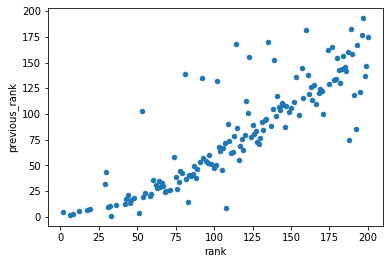

In [22]:
peakprevfiltUS = peakprevUS.loc[peakprevUS['previous_rank'] != -1]
peakprevfiltUS.plot(kind='scatter', x='rank', y='previous_rank')

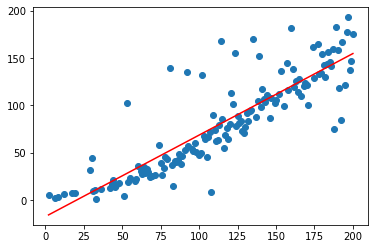

In [23]:
X = peakprevfiltUS[ "rank"]
y = peakprevfiltUS["previous_rank"]
theta = numpy.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.show()

In [24]:
peakprevUK = weekly_gb_charts.loc[weekly_gb_charts['date'] == "2021-11-18T00:00:00.000000000"]
peakprevUK.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,1,5,3458623,2021-11-18
1,2,spotify:track:5enxwA8aAbwZbf5qCHORXi,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,2,-1,1,2787198,2021-11-18
2,3,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,1,2,10,2616693,2021-11-18
3,4,spotify:track:7rglLriMNBPAyuJOMGwi39,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,EMI,2,4,14,2237196,2021-11-18
4,5,spotify:track:2BzAGK3lEZAQz5cU0Ae1wd,ArrDee,Flowers (Say My Name),Universal-Island Records Ltd.,5,5,2,2139786,2021-11-18


<AxesSubplot:xlabel='rank', ylabel='previous_rank'>

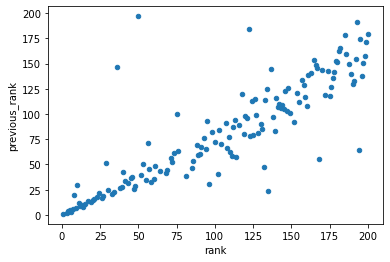

In [25]:
peakprevfiltUK = peakprevUK.loc[peakprevUK['previous_rank'] != -1]
peakprevfiltUK.plot(kind='scatter', x='rank', y='previous_rank')

After this preliminary research, we determined that we wanted to look at 2 artists for our research question: Adele, who is from the UK, and Lil Nas X, who is from the US. So we did a little bit more exploratory analysis into these two artists. 

In [26]:
# Go through US charts and find all the rows with Lil Nas X
lilnasxUS = weekly_us_charts.loc[weekly_us_charts['artist_names'] == "Lil Nas X"]
print(len(lilnasxUS))
lilnasxUS.head()

88


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
18,19,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,16,8,3804112,2021-01-07
32,33,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,19,9,3590559,2021-01-14
31,32,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,33,10,3304136,2021-01-21
41,42,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,32,11,2890140,2021-01-28
47,48,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,42,12,2670692,2021-02-04


In [27]:
# Go through UK charts and find all the rows with Lil Nas X
lilnasxUK = weekly_gb_charts.loc[weekly_gb_charts['artist_names'] == "Lil Nas X"]
print(len(lilnasxUK))
lilnasxUK.head()

78


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
18,19,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,47,8,870167,2021-01-07
23,24,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,19,9,853586,2021-01-14
33,34,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,24,10,775141,2021-01-21
47,48,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,34,11,691652,2021-01-28
58,59,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,48,12,602965,2021-02-04


In [28]:
# Go through US charts and find all the rows with Adele
adeleUS = weekly_us_charts.loc[weekly_us_charts['artist_names'] == "Adele"]
print(len(adeleUS))
adeleUS.head()

73


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
167,168,spotify:track:6O5TrlFWTYvznd9fMC0VvU,Adele,When We Were Young,XL Recordings,168,-1,1,1500336,2021-10-14
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,-1,1,20462767,2021-10-21
34,35,spotify:track:6O5TrlFWTYvznd9fMC0VvU,Adele,When We Were Young,XL Recordings,35,168,2,3150036,2021-10-21
44,45,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,45,-1,1,2769224,2021-10-21
53,54,spotify:track:6IAZHEBUIGJ6NJKxxOBIEr,Adele,Rolling in the Deep,XL Recordings,54,-1,1,2506748,2021-10-21


In [29]:
# Go through UK charts and find all the rows with Adele
adeleUK = weekly_gb_charts.loc[weekly_gb_charts['artist_names'] == "Adele"]
print(len(adeleUK))
adeleUK.head()

168


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
173,174,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,-1,9,338653,2021-01-14
186,187,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,174,10,333786,2021-01-21
176,177,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,187,11,341364,2021-01-28
185,186,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,177,12,342555,2021-02-04
177,178,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,186,13,340240,2021-02-11


Interestingly already, we see a bit of a difference! In the year 2021, Lil Nas X (US) was on the weekly Top 200 charts in the US 88 times, while he was on the weekly Top 200 charts in UK for a fewer number of times 78. For Adele, she was on the US charts 73 times but on the UK ones 168 times. 

For both of these artists, we also wanted to look at the songs that appeared on the charts.

In [30]:
lilnasxUS['track_name'].unique()

array(['HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN',
       'THATS WHAT I WANT', 'DEAD RIGHT NOW', 'TALES OF DOMINICA',
       'LOST IN THE CITADEL', 'DONT WANT IT', 'VOID', 'LIFE AFTER SALEM'],
      dtype=object)

In [31]:
lilnasxUK['track_name'].unique()

array(['HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN',
       'THATS WHAT I WANT', 'DEAD RIGHT NOW', 'TALES OF DOMINICA',
       'LOST IN THE CITADEL', 'DONT WANT IT', 'VOID'], dtype=object)

In [32]:
adeleUS['track_name'].unique()

array(['When We Were Young', 'Easy On Me', 'Someone Like You',
       'Rolling in the Deep', 'Love In The Dark', 'Set Fire to the Rain',
       'All I Ask', 'Chasing Pavements',
       'Send My Love (To Your New Lover)', 'Make You Feel My Love',
       'Hello', 'Oh My God', 'Can I Get It', 'My Little Love',
       'I Drink Wine', 'Strangers By Nature', 'Cry Your Heart Out',
       'To Be Loved', 'All Night Parking (with Erroll Garner) Interlude',
       'Woman Like Me', 'Hold On', 'Love Is A Game'], dtype=object)

In [33]:
adeleUK['track_name'].unique()

array(['Someone Like You', 'Make You Feel My Love', 'Rolling in the Deep',
       'When We Were Young', 'Love In The Dark', 'Chasing Pavements',
       'Set Fire to the Rain', 'Send My Love (To Your New Lover)',
       'Rumour Has It', 'All I Ask', 'Skyfall', 'Hello', 'Easy On Me',
       'Turning Tables', 'Water Under the Bridge', 'Hometown Glory',
       'Remedy', 'Oh My God', 'I Drink Wine', 'My Little Love',
       'Can I Get It', 'Strangers By Nature', 'Cry Your Heart Out',
       'To Be Loved', 'Hold On',
       'All Night Parking (with Erroll Garner) Interlude',
       'Woman Like Me', 'Love Is A Game'], dtype=object)

In [34]:
# Find songs in one list that aren't on the other
lilnasxUKsongs = lilnasxUK['track_name'].unique()
lilnasxUSsongs = lilnasxUS['track_name'].unique()

for song in lilnasxUSsongs:
    if song not in lilnasxUKsongs:
        print("The song " + song + " is in the US charts but not the UK charts")
        
for songs in lilnasxUKsongs:
    if songs not in lilnasxUSsongs:
        print("The song " + songs + " is in the UK charts but not the US charts")

The song LIFE AFTER SALEM is in the US charts but not the UK charts


In [35]:
# Find songs in one list that aren't on the other
adeleUKsongs = adeleUK['track_name'].unique()
adeleUSsongs = adeleUS['track_name'].unique()

for song in adeleUSsongs:
    if song not in adeleUKsongs:
        print("The song " + song + " is in the US charts but not the UK charts")
        
for songs in adeleUKsongs:
    if songs not in adeleUSsongs:
        print("The song " + songs + " is in the UK charts but not the US charts")

The song Rumour Has It is in the UK charts but not the US charts
The song Skyfall is in the UK charts but not the US charts
The song Turning Tables is in the UK charts but not the US charts
The song Water Under the Bridge is in the UK charts but not the US charts
The song Hometown Glory is in the UK charts but not the US charts
The song Remedy is in the UK charts but not the US charts


We then wanted to see the rankings of each of the songs for each of the artists in plot form


<AxesSubplot:xlabel='track_name'>

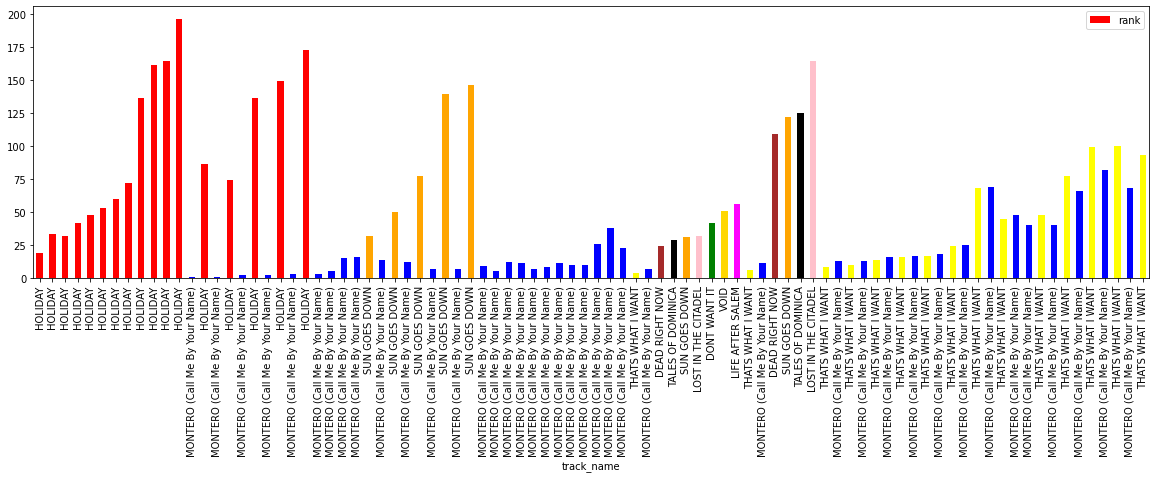

In [36]:
#HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN', 'THATS WHAT I WANT', 'DEAD RIGHT NOW', 'TALES OF DOMINICA', 'LOST IN THE CITADEL', 'DONT WANT IT', 'VOID

songs = lilnasxUS['track_name'].values

barcolors = []
for song in songs:
    #print(song[0] == "HOLIDAY")
    #song = y.astype("string")
    if song == "HOLIDAY":
        barcolors.append('red')
    elif song == "MONTERO (Call Me By Your Name)":
        barcolors.append('blue')
    elif song == "SUN GOES DOWN":
        barcolors.append('orange')
    elif song == "THATS WHAT I WANT":
        barcolors.append('yellow')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('brown')
    elif song == "TALES OF DOMINICA":
        barcolors.append('black')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('purple')
    elif song == "LOST IN THE CITADEL":
        barcolors.append('pink')
    elif song == "DONT WANT IT":
        barcolors.append('green')
    elif song == "VOID":
        barcolors.append('gold')
    elif song == "LIFE AFTER SALEM":
        barcolors.append('magenta')
    
lilnasxUS.plot(kind='bar', x='track_name', y='rank', figsize=(20,5), color=barcolors)

<AxesSubplot:xlabel='track_name'>

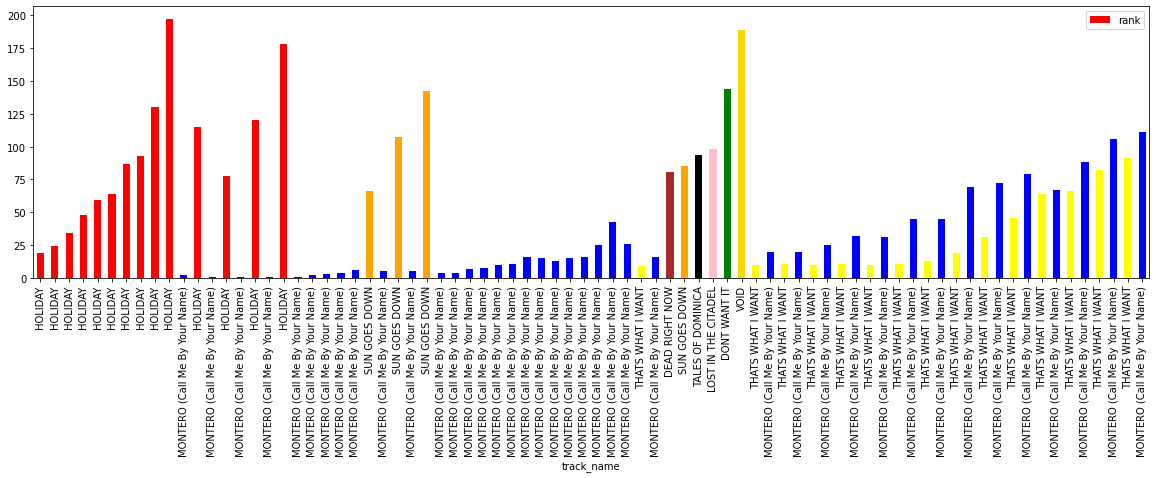

In [37]:
songs = lilnasxUK['track_name'].values

barcolors = []
for song in songs:
    #print(song[0] == "HOLIDAY")
    #song = y.astype("string")
    if song == "HOLIDAY":
        barcolors.append('red')
    elif song == "MONTERO (Call Me By Your Name)":
        barcolors.append('blue')
    elif song == "SUN GOES DOWN":
        barcolors.append('orange')
    elif song == "THATS WHAT I WANT":
        barcolors.append('yellow')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('brown')
    elif song == "TALES OF DOMINICA":
        barcolors.append('black')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('purple')
    elif song == "LOST IN THE CITADEL":
        barcolors.append('pink')
    elif song == "DONT WANT IT":
        barcolors.append('green')
    elif song == "VOID":
        barcolors.append('gold')
    #elif song == "LIFE AFTER SALEM":
        #barcolors.append('magenta')
    
lilnasxUK.plot(kind='bar', x='track_name', y='rank', figsize=(20,5), color=barcolors)

We want to plot the ranks of the songs in each country for both Lil Nas X and Adele. 

<AxesSubplot:xlabel='date', ylabel='rank'>

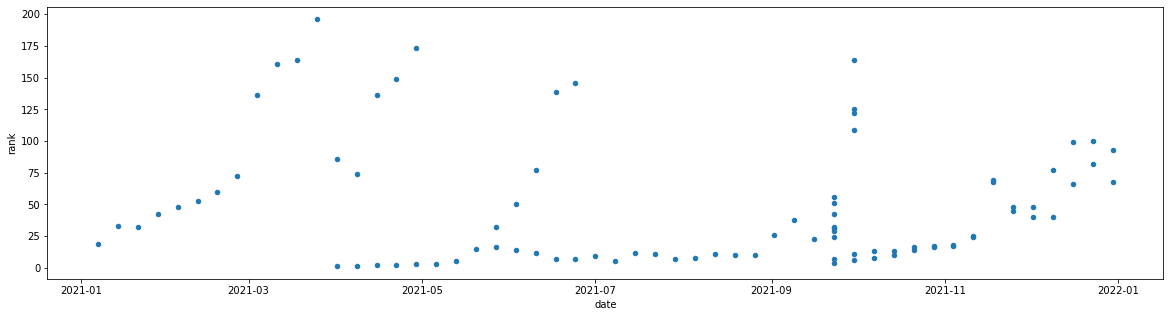

In [38]:
lilnasxUS.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

<AxesSubplot:xlabel='date', ylabel='rank'>

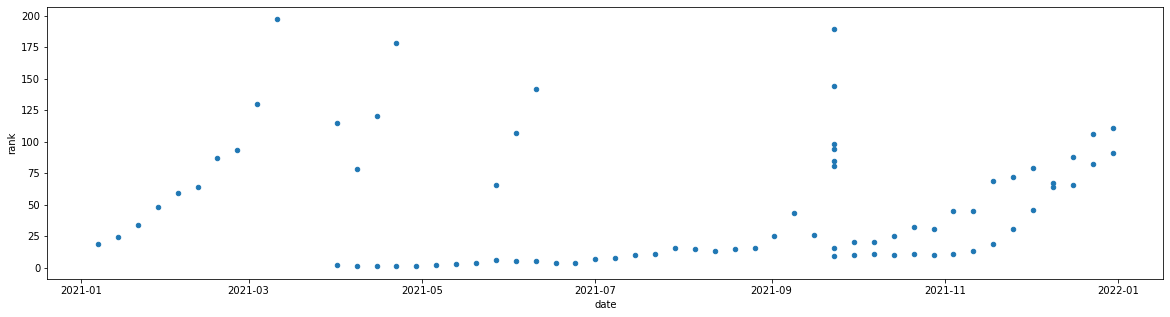

In [39]:
lilnasxUK.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

<AxesSubplot:xlabel='date', ylabel='rank'>

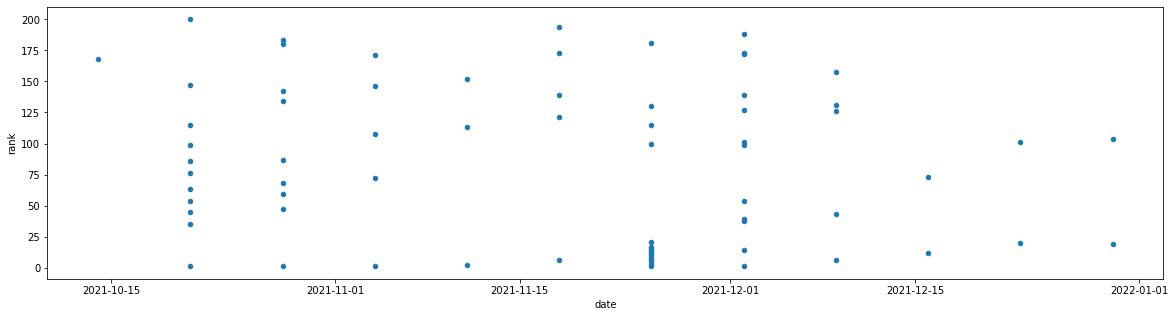

In [40]:
adeleUS.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

<AxesSubplot:xlabel='date', ylabel='rank'>

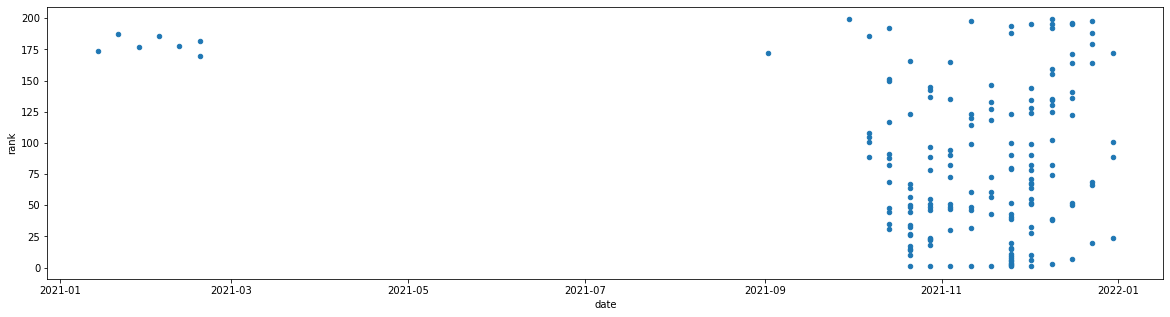

In [41]:
adeleUK.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

## Results

As we can see from above, a preliminary analysis of the data showed some interesting trends. 

First, doing a preliminary analysis of the data by looking at **streams of the Top 200 Hits for each week for eacch country in the year 2021** showed that people in the US streamed quite a bit more than people in the UK. While the maximum number of streams we say in the US was 3*10^7, the maximum that we saw in the UK was 10^7. 

We also did a short analysis on the ranking of the **ranks for a certain day versus the previous rank that it held**. While we found that most of them held the same ranking as the week before (ie, lots of points fell along the x=y line), there were visually apparent differences between the US and UK graphs. *For the US scatter plot, a lot of the points that didn't fall near the x=y line were towards the songs with the most ranking, while in the UK it seemed like there were points along the smaller rankings as well that didn't fall close to that line.* We thought that was interesting, since the songs with the lowest rankings are ones that are the most frequently listened to/usually stayed ranked higher. 

In order to answer our research question, we examined the ranks of two artists: **Lil Nas X, who is from the US**, and **Adele, who is from the UK**. The first goal of our data exploration was to see if the origin country of an artist affects their presence on the weekly Top 200 Hits list. 

The first analysis we did was a simple one -- **checking to see how many times each artists's songs showed up in the weekly charts for each country** (note: we also counted if a song showed up on the charts multiple times in the same day). We immediately saw that in the year 2021, Lil Nas X (US) was on the weekly Top 200 charts in the US 88 times, while he was on the weekly Top 200 charts in UK for a fewer number of times 78. For Adele, she was on the US charts 73 times but on the UK ones 168 times, which is considerably more. *So it seems that the country that an artist is from is slightly correlated with their frequency on the charts.*

Next, we wanted to see **if more songs were listened to by Spotify users of the same country as the artist**. So we went through to see which Lil Nas X songs were listened to by US listeners but not UK listeners, and which Adele songs were listened to by UK listeners but not US listeners. We found that:

For Lil Nas X:
- The song LIFE AFTER SALEM is in the US charts but not the UK charts

For Adele: 
- The song Rumour Has It is in the UK charts but not the US charts
- The song Skyfall is in the UK charts but not the US charts
- The song Turning Tables is in the UK charts but not the US charts
- The song Water Under the Bridge is in the UK charts but not the US charts
- The song Hometown Glory is in the UK charts but not the US charts
- The song Remedy is in the UK charts but not the US charts

*In this way, we found that the listeners might listen to more songs from an album (therefore giving the songs a higher ranking) if the artist they are listening to is from their country.*

Then, we wanted to see the **rankings of each of the songs for Lil Nas X in plot form**. We didn't see many surprising results here, as we saw drop off of rankings of songs similarly for Lil Nas X in the US and the UK. (The bar chart looks very similar). 

Afterward, we wanted to **compare the ranks of the songs in each country for each of the artists as compared to the days that they were on the Top 200 Chart**. This analysis also produced interesting results, as we found similar rankings of Lil Nas X's songs in both the US and UK (visually, it seems that Lil Nas X's rankings were slightly lower in the US, but it's a fairly small difference that we didn't feel like we could make a strong conclusion about it), but Adele had songs that were popular in the UK earlier on during the year that weren't on the charts in the US (examining the Y scales of both the scatterplots for Adele). This analysis of ranking as compared to the dates showed us that *the country that an artist is from is slightly correlated with their ranking and frequency on the charts*. 

# Map Analysis 

In [42]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [43]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

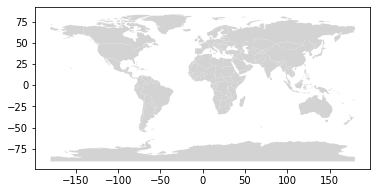

In [44]:
countries.plot(color="lightgrey")

In [45]:
adeleUSSum = adeleUS["streams"].sum()
print(adeleUSSum)
adeleUKSum = adeleUK["streams"].sum()
print(adeleUKSum)


279080130
169941810


In [46]:
lilnasxUSSum = lilnasxUS["streams"].sum()
print(lilnasxUSSum)
lilnasxUKSum = lilnasxUK["streams"].sum()
print(lilnasxUKSum)

394252889
101204926


In [47]:
usStreams = weekly_us_charts["streams"].sum()
ukStreams = weekly_gb_charts["streams"].sum()
print(usStreams)
adeleUSRatio = adeleUSSum/usStreams
lilnasxUSRatio = lilnasxUSSum/usStreams
print(usStreams)
adeleUKRatio = adeleUKSum/ukStreams
lilnasxUKRatio = lilnasxUKSum/ukStreams

26957184222
26957184222


In [50]:
adeleUSRankToDate = adeleUS[["rank", "date"]]
adeleUSMonthlyRank = adeleUSRankToDate.groupby([adeleUSRankToDate['date'].dt.to_period('M')], as_index='false').mean()
adeleUSMonthlyRank["iso_a3"] = "USA"
print(len(adeleUSMonthlyRank))
adeleUKRankToDate = adeleUK[["rank", "date"]]
adeleUKMonthlyRank = adeleUKRankToDate.groupby([adeleUKRankToDate['date'].dt.to_period('M')], as_index='false').mean()
len(adeleUKMonthlyRank)
adeleUKMonthlyRank["iso_a3"] = "GBR"
#adeleMonthlyStreams = adeleUKMonthlyStreams.append(adeleUSMonthlyStreams)

3


In [51]:
lilnasxUSRankToDate = lilnasxUS[["rank", "date"]]
lilnasxUSMonthlyRank = lilnasxUSRankToDate.groupby([lilnasxUSStreamToDate['date'].dt.to_period('M')], as_index='false').mean()
print(len(lilnasxUSMonthlyRank))
lilnasxUSMonthlyRank["iso_a3"] = "USA"
lilnasxUKRankToDate = lilnasxUK[["rank", "date"]]
lilnasxUKMonthlyRank = lilnasxUKRankToDate.groupby([lilnasxUKStreamToDate['date'].dt.to_period('M')], as_index='false').mean()
len(lilnasxUKMonthlyRank)
lilnasxUKMonthlyRank["iso_a3"] = "GBR"
#lilnasxMonthlyStreams = lilnasxUKMonthlyStreams.append(lilnasxUSMonthlyStreams)
print(lilnasxUKMonthlyRank)

12
               rank iso_a3
date                      
2021-01   31.250000    GBR
2021-02   75.750000    GBR
2021-03  163.500000    GBR
2021-04   55.222222    GBR
2021-05   16.200000    GBR
2021-06   44.500000    GBR
2021-07   10.400000    GBR
2021-08   14.750000    GBR
2021-09   64.615385    GBR
2021-10   18.750000    GBR
2021-11   38.125000    GBR
2021-12   80.000000    GBR


In [64]:
def plotmapsStandardized(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index:
            d = {'rank': [df1.loc[date]["rank"], df2.loc[date]["rank"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="rank", cmap="inferno", vmin=1, vmax=200, legend=True)
            plt.title(date.strftime('%b-%Y') + " " + artist + " Mean Rank")
            plt.show()
            
def plotmaps(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index:
            d = {'rank': [df1.loc[date]["rank"], df2.loc[date]["rank"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
#             plt.subplot(1, 2, 1)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="rank", cmap="viridis",legend=True)
            plt.title(date.strftime('%b-%Y') + " " + artist + " Mean Rank (relative)")


## Lil Nas X Map Plots of Average Ranking 

Color Map plots of US and UK's average ranking for all Lil Nas X songs. 

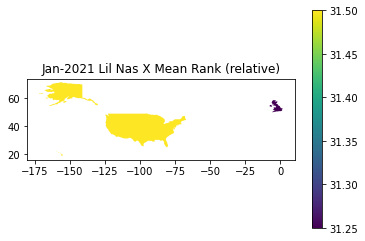

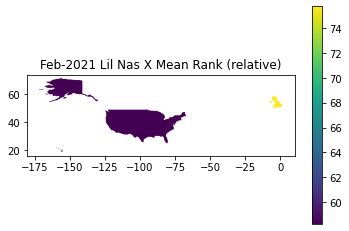

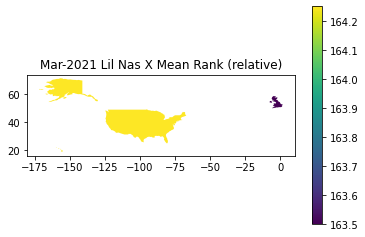

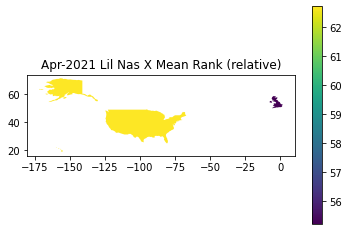

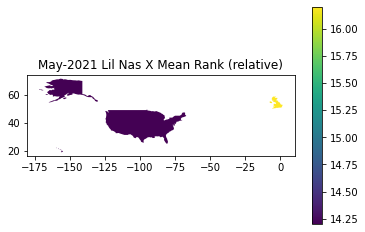

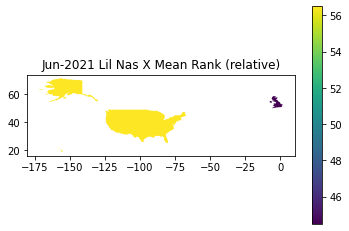

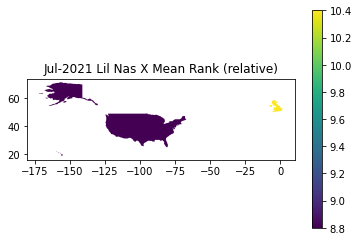

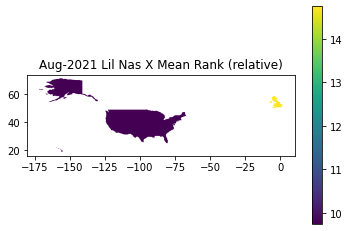

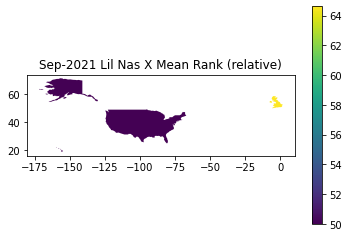

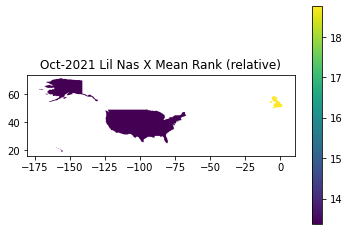

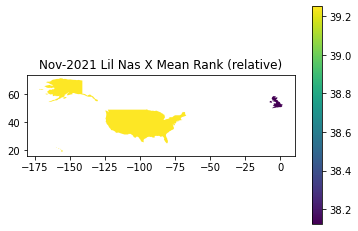

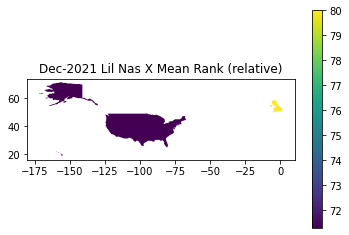

In [65]:

plotmaps(lilnasxUSMonthlyRank, lilnasxUKMonthlyRank, "Lil Nas X")

Above are monthly graphs of the rankings of the songs for both US and UK. You can see that the regions are colored by the average ranking of the artist Lil Nas X. The darker purple is indicative of a smaller rank number, which means that the song is charting better. 

These are the relative rankings of Lil Nas X. Relative rankings mean that the legend is bounded by both the country's min and max ranking, and each map is only loosely related. These maps are best for examining the change between the US and UK ranking in respect to each other. 

As you can see, in the beginning of the year, the UK is actually ranking Lil Nas X songs higher. But also looking at the ranges, the ranges are quite small- less than 10 ranks apart. 

The ranks trade around quite a few times, but looking at key times in Lil Nas X's career, we can maybe try to do a little better of analysis. His hit song "Montero" came out in April, so what if we looked at only those times? 



## Lil Nas X Average Ranking Map plots- April only 
Montero was released on the 8th of April. 

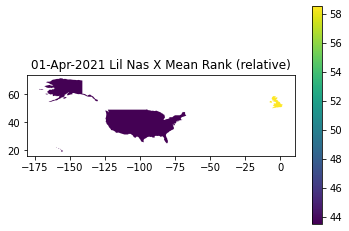

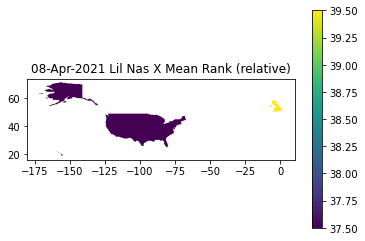

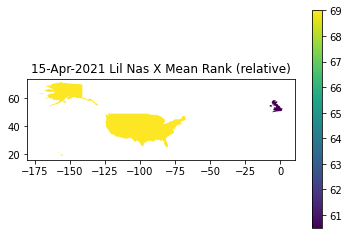

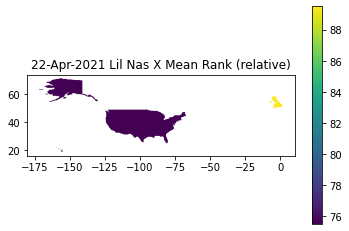

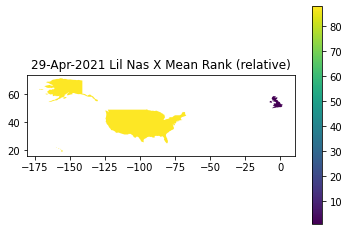

In [54]:
def plotmapForApril(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index and date.month == 4:
            d = {'rank': [df1.loc[date]["rank"], df2.loc[date]["rank"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="rank", cmap="viridis",legend=True)
            plt.title(date.strftime('%d-%b-%Y') + " " + artist + " Mean Rank (relative)")

lilnasxUSWeeklyRank = lilnasxUSRankToDate.groupby([lilnasxUSStreamToDate['date'].dt.date], as_index='false').mean()
lilnasxUSWeeklyRank["iso_a3"] = "USA"
lilnasxUKWeeklyRank = lilnasxUKRankToDate.groupby([lilnasxUKStreamToDate['date'].dt.date], as_index='false').mean()
lilnasxUKWeeklyRank["iso_a3"] = "GBR"
plotmapForApril(lilnasxUSWeeklyRank, lilnasxUKWeeklyRank, "Lil Nas X")

Looking at the just april maps, we can see that still although Lil Nas X is a US artist, UK is leading the charts. In the week that Montero was released, Lil Nas X's rank shot up by around 20 places, and then slowly died down on the US's side as by the 3rd week of April, Lil Nas X's mean ranking stayed in the 60-80s, but the UK was loving Lil Nas X, shooting him up all the way to 10th place! 

Seems like the peak of Lil Nas X was a bit low in the US, but there was a later and higher peak in the UK. One concern of mine is that there are other lower ranked songs other than his new release that are popular in the US, that contribute to a low mean ranking, that aren't there in the UK. To combat that, I am looking at monthly ratio of streams. 

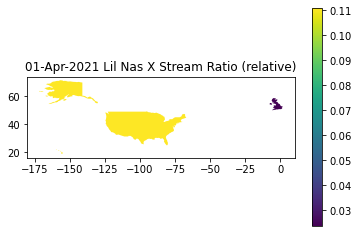

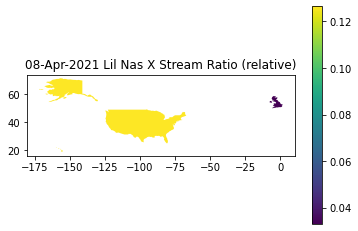

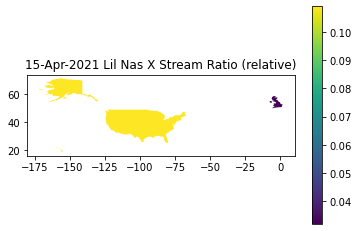

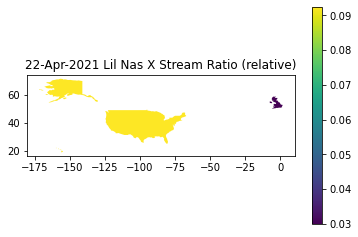

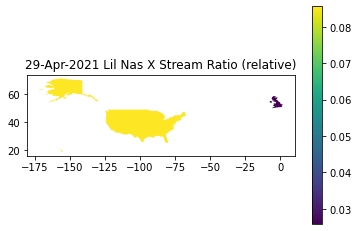

In [59]:
usStreamsToDate = weekly_us_charts[["streams", "date"]]
usMonthlyStreams = usStreamsToDate.groupby([usStreamsToDate['date'].dt.to_period('M')], as_index='false').sum()
usWeeklyStreams = ukStreamsToDate.groupby([ukStreamsToDate['date'].dt.date], as_index='false').sum()

ukStreamsToDate = weekly_gb_charts[["streams", "date"]]
ukMonthlyStreams = ukStreamsToDate.groupby([ukStreamsToDate['date'].dt.to_period('M')], as_index='false').sum()

ukWeeklyStreams = ukStreamsToDate.groupby([ukStreamsToDate['date'].dt.date], as_index='false').sum()

adeleUSStreamToDate = adeleUS[["streams", "date"]]
adeleUSMonthlyStreams= adeleUSStreamToDate.groupby([adeleUSStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
adeleUSMonthlyStreams["iso_a3"] = "USA"
adeleUSMonthlyStreams["streams"] = adeleUSMonthlyStreams["streams"]/usMonthlyStreams["streams"]

adeleUKStreamToDate = adeleUK[["streams", "date"]]
adeleUKMonthlyStreams= adeleUKStreamToDate.groupby([adeleUKStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
adeleUKMonthlyStreams["iso_a3"] = "GBR"
adeleUKMonthlyStreams["streams"] = adeleUKMonthlyStreams["streams"]/ukMonthlyStreams["streams"]


lilnasxUSStreamToDate = lilnasxUS[["streams", "date"]]
lilnasxUSMonthlyStreams= lilnasxUSStreamToDate.groupby([lilnasxUSStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
lilnasxUSMonthlyStreams["iso_a3"] = "USA"
lilnasxUSMonthlyStreams["streams"] = lilnasxUSMonthlyStreams["streams"]/usMonthlyStreams["streams"]

lilnasxUKStreamToDate = lilnasxUK[["streams", "date"]]
lilnasxUKMonthlyStreams= lilnasxUKStreamToDate.groupby([lilnasxUKStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
lilnasxUKMonthlyStreams["iso_a3"] = "GBR"
lilnasxUKMonthlyStreams["streams"] = lilnasxUKMonthlyStreams["streams"]/ukMonthlyStreams["streams"]


lilnasxUSWeeklyStreams= lilnasxUSStreamToDate.groupby([lilnasxUSStreamToDate['date'].dt.date], as_index='false').sum()
lilnasxUSWeeklyStreams["iso_a3"] = "USA"
lilnasxUSWeeklyStreams["streams"] = lilnasxUSWeeklyStreams["streams"]/usWeeklyStreams["streams"]

lilnasxUKWeeklyStreams= lilnasxUKStreamToDate.groupby([lilnasxUKStreamToDate['date'].dt.date], as_index='false').sum()
lilnasxUKWeeklyStreams["iso_a3"] = "GBR"
lilnasxUKWeeklyStreams["streams"] = lilnasxUKWeeklyStreams["streams"]/ukWeeklyStreams["streams"]
def plotmapsStreams(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index:
            d = {'streams': [df1.loc[date]["streams"], df2.loc[date]["streams"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="streams", cmap="viridis",legend=True)
            plt.title(date.strftime('%d-%b-%Y') + " " + artist + " Stream Ratio (relative)")
def plotmapsStreamsWeekly(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index and date.month == 4:
            d = {'streams': [df1.loc[date]["streams"], df2.loc[date]["streams"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="streams", cmap="viridis",legend=True)
            plt.title(date.strftime('%d-%b-%Y') + " " + artist + " Stream Ratio (relative)")
plotmapsStreamsWeekly(lilnasxUSWeeklyStreams, lilnasxUKWeeklyStreams, "Lil Nas X")

Actually, when looking at the stream ratios, we can see that the US loved Montero and Lil Nas X- the US had a higher stream ratio for all of April. This means that by calculating the mean rankings, we may have had a couple lower ranked Nas songs that pulled down the overall mean ranking. 

Let's take a look at the month by month stream ratios for Lil Nas X! 


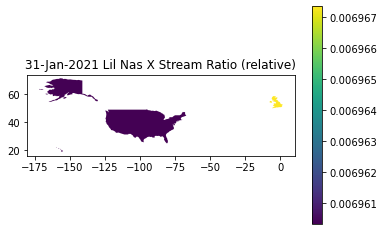

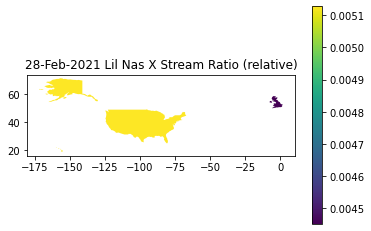

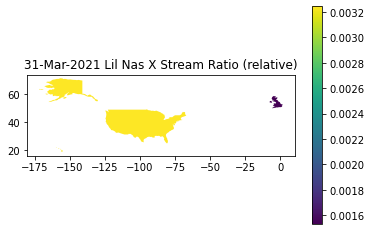

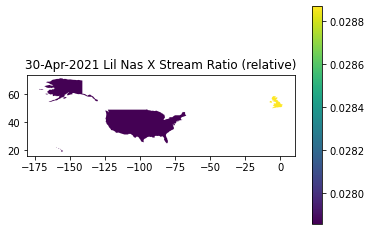

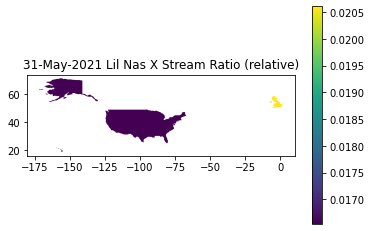

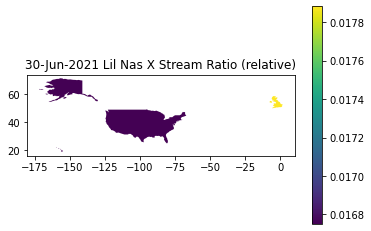

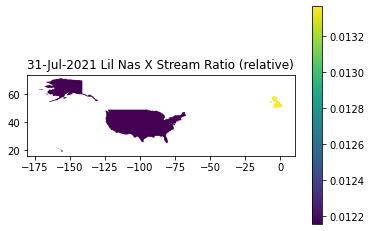

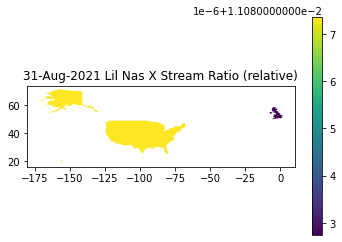

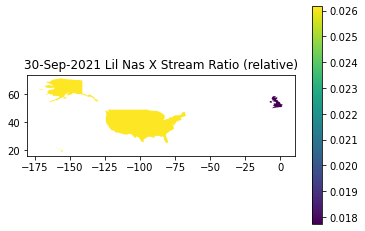

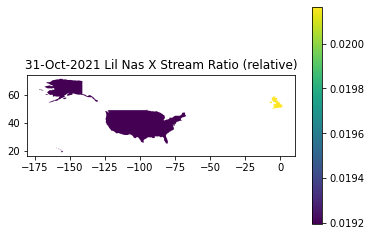

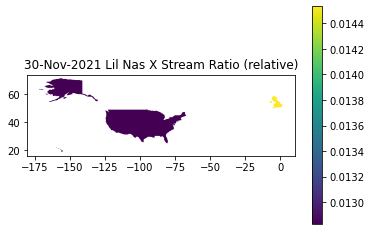

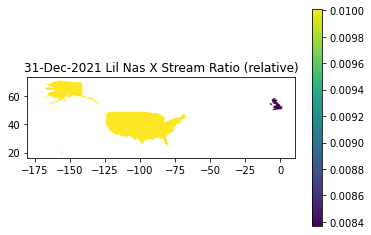

In [61]:
plotmapsStreams(lilnasxUSMonthlyStreams, lilnasxUKMonthlyStreams, "Lil Nas X")

In the month by month play however, we can see that there's still a lot of switching around between the UK and the US's streaming of his songs. We can conclude that around big releases, the US is faster to pick up and stream Lil Nas X's songs, but he remains well loved in both countries. 

Now let's move on to Adele! 

## Adele's Maps 

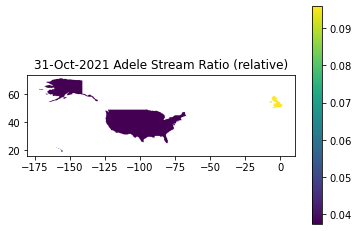

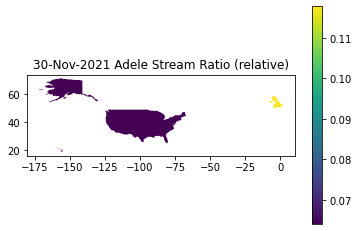

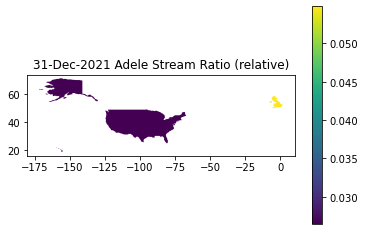

In [62]:
plotmapsStreams(adeleUSMonthlyStreams, adeleUKMonthlyStreams, "Adele")

The analysis of this is much easier- Adele was not that popular in the US, so she only charted 3 months in the US. And we can see that UK is winning every month- Adele is clearly much more popular in the UK, but the peak timing is quite similar, so both the UK and US were able to pick up streaming Adele's new music released in November (the peak of her stream ratio) around the same time. 

## Discussion